# IDDAS Information

## setup
below functions are needed to setup the sparql template and querying support

The endpoint is hard-coded in the python code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from enable_sparql import execute_to_df, generate_sparql

All requests give us information about IDDAS:
- Property and type list
- Number of datasets, distributions, download URL and media type
- Information to catalogs list (numbers of datasets, download url and distribution)

This request shows us all the properties used in IDDAS and how many use.

In [2]:
execute_to_df('./sparql_requests/all_props.sparql')

,property,count
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,153066
1,http://purl.org/dc/terms/description,52756
2,https://schema.org/name,50609
3,https://schema.org/variableMeasured,50609
4,http://www.w3.org/ns/prov#used,50080
5,http://purl.org/dc/terms/title,48206
6,http://www.w3.org/ns/dcat#distribution,24818
7,http://www.w3.org/ns/dcat#accessService,24653
8,http://www.w3.org/ns/dcat#dataset,23903
9,http://www.w3.org/ns/dcat#servesDataset,22689


This request shows us all the types used in IDDAS and how many use.

In [3]:
execute_to_df('./sparql_requests/all_types.sparql')

,type,cnt
0,https://schema.org/PropertyValue,50609
1,http://www.w3.org/ns/dcat#Distribution,24818
2,http://www.w3.org/ns/dcat#Dataset,23896
3,https://schema.org/Dataset,23896
4,http://purl.org/dc/terms/Location,16637
5,http://purl.org/dc/terms/PeriodOfTime,12757
6,http://www.w3.org/2004/02/skos/core#Concept,176
7,http://www.w3.org/2000/01/rdf-schema#Resource,83
8,http://www.w3.org/ns/dcat#DataService,57
9,http://www.w3.org/1999/02/22-rdf-syntax-ns#Pro...,48


This request shows us number of type per type per property

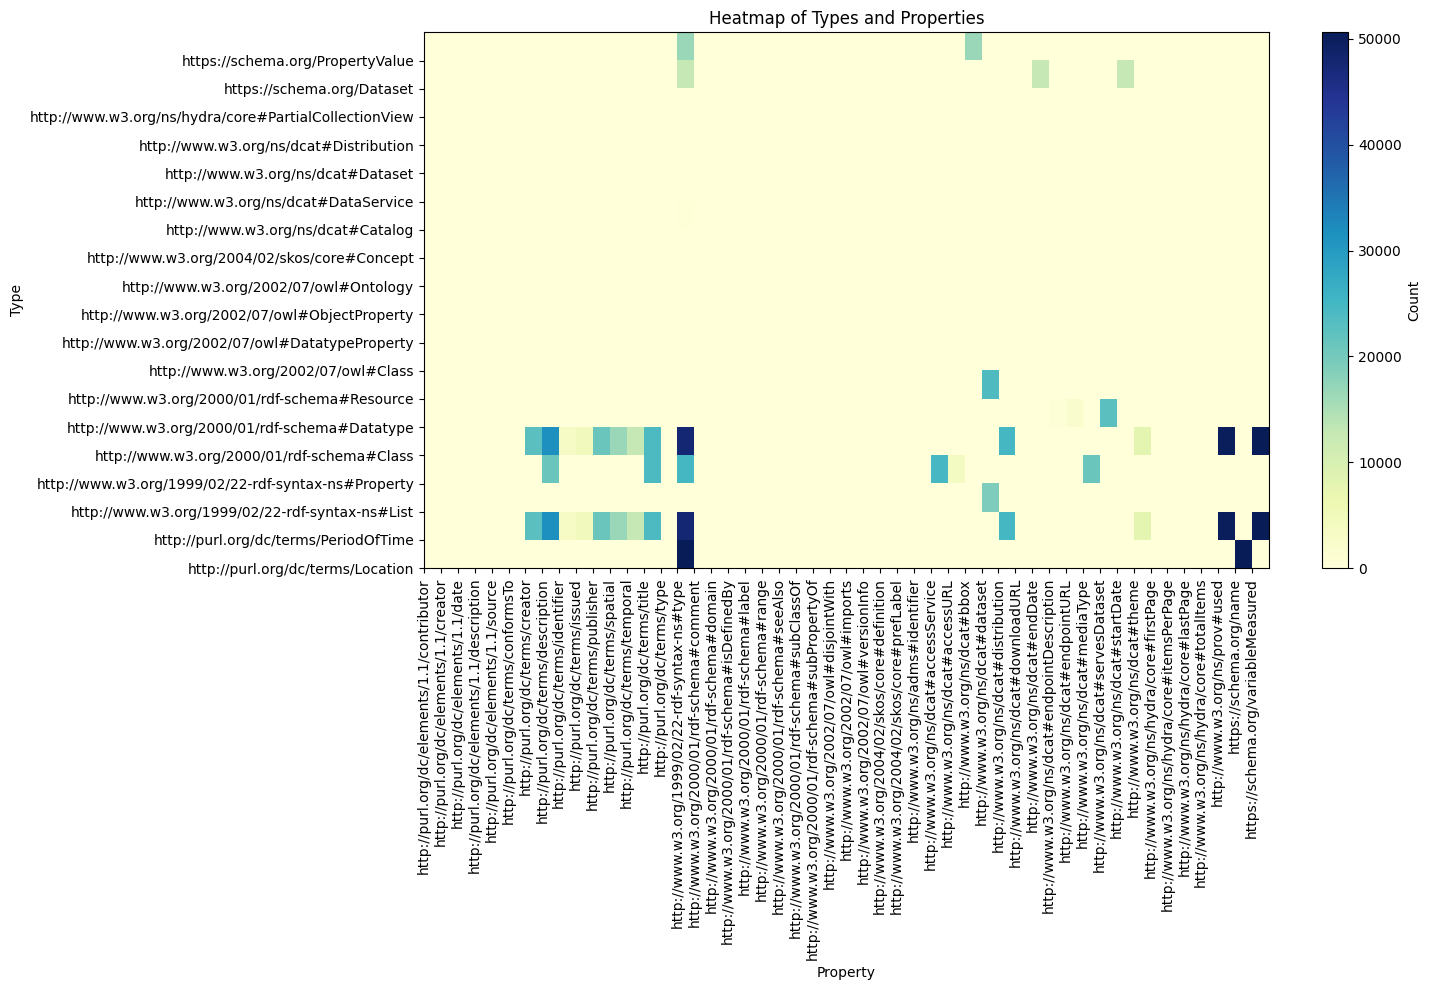

In [7]:
df = execute_to_df('./sparql_requests/all_types_props.sparql')

# Ensure that 'count' column is numeric
df['count'] = pd.to_numeric(df['count'])

# Create a pivot table to mix the counts for type and predicate
pivot_df = df.pivot_table(values='count', index='type', columns='property', aggfunc='sum', fill_value=0)

# Plotting the heatmap using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(pivot_df.values, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=range(len(pivot_df.columns)), labels=pivot_df.columns, rotation=90)
plt.yticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.xlabel('Property')
plt.ylabel('Type')
plt.title('Heatmap of Types and Properties')
plt.tight_layout()

# Show the plot
plt.show()

Catalog list :
- Number of datasets
- Number of datasets with distribution
- Number of datasets with download URL
- Number of datasets with access URL
- Number of datasets with identifier
- Number of datasets with media type

In [3]:
df = execute_to_df('./sparql_requests/catalog_info.sparql')
df

,catalog_name,cnt_datasets,cnt_datasets_dist,cnt_datasets_dlurl,cnt_datasets_accessurl,cnt_datasets_id,cnt_datasets_mediatype
0,All catalog,23896,21889,87,847,2771,21042
1,WEkEO,2005,0,0,0,0,0
2,VITO /Copernicus Global Land Services,127,127,0,127,127,0
3,European Environment Agency SDI Catalog,722,720,87,720,718,0
4,Blue-Cloud DD&AS argo DCAT Catalog - Page 1,9847,9847,0,0,0,9847
5,Blue-Cloud DD&AS SeaDataNet Products DCAT Catalog,49,49,0,0,49,49
6,Blue-Cloud DD&AS Integrated Carbon Observation...,301,301,0,0,301,301
7,Blue-Cloud DD&AS EuroBIS DCAT Catalog,1232,1232,0,0,1232,1232
8,Blue-Cloud DD&AS EMODnet Physics DCAT Catalog,20,20,0,0,20,20
9,Blue-Cloud DD&AS EMODnet Chemistry DCAT Catalog,324,324,0,0,324,324


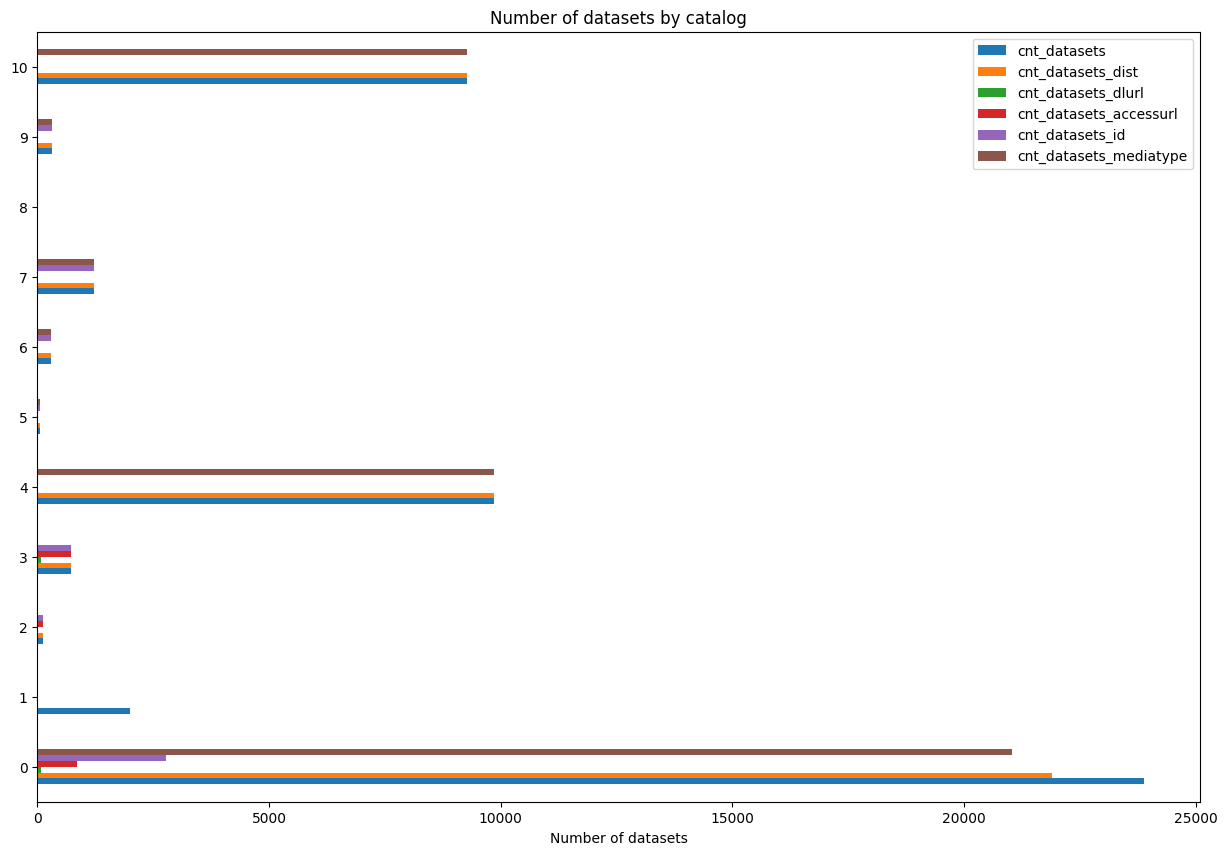

In [8]:
numeric_columns = [
    'cnt_datasets', 'cnt_datasets_dist', 'cnt_datasets_dlurl', 
    'cnt_datasets_accessurl', 'cnt_datasets_id', 'cnt_datasets_mediatype'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plot_data = df[numeric_columns]
plot_data.plot(kind='barh', figsize=(15, 10))
plt.title('Number of datasets by catalog')
plt.xlabel('Number of datasets')
plt.show()
